In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap
from PyComplexHeatmap import *

In [3]:
expr = pd.read_csv("../data/test_expression_datasets.csv",index_col=0)

selected_rows = ['ADAM7', 'HLA-DOA',  'PTGIR', 'OPCML-IT1',  'MAGEB1']


label_rows = expr.apply(lambda x:x.name if x.name in selected_rows else None,axis=1)
print(label_rows)
print(expr.shape)

ADAM7          ADAM7    
C8orf34-AS1    None     
SMIM28         None     
LINC01114      None     
KLK3           None     
               ...      
TRAJ45         None     
TPMTP1         None     
OPCML-IT1      OPCML-IT1
HNRNPCP4       None     
MAGEB1         MAGEB1   
Length: 89, dtype: object
(89, 16)


In [4]:
expr.head()

,NCI-H660,PC-3,VCaP,DU-145,MDA-PCa-2b,22RV1,LNCaP-Clone-FGC,SUP-HD1,L-540,L-1236,KM-H2,HDLM-2,Hs-616-T,L-428,Hs-611-T,TO-175-T
ADAM7,-1.000000,-1.0,-0.044425,-1.0,-0.303654,-0.604782,-0.123861,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0
C8orf34-AS1,-1.000000,-1.0,-0.015847,-1.0,-0.848602,-0.215875,-0.251406,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0
SMIM28,-0.795724,-1.0,-0.092080,-1.0,-1.000000,0.070939,-0.705117,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0
LINC01114,-1.000000,-1.0,-0.241584,-1.0,-1.000000,-0.766805,-0.132841,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0
KLK3,-1.000000,-1.0,0.531804,-1.0,1.000000,0.564560,1.000000,-0.832337,-0.442301,-0.472336,-0.359856,-0.911472,-0.795981,-0.391838,-1.0,-1.0


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


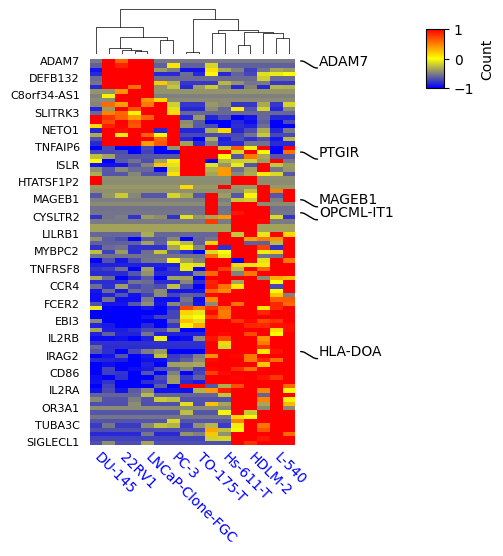

In [17]:
row_ha = HeatmapAnnotation( 
                            selected=anno_label(label_rows,colors='black'),
                            axis=0,verbose=0, 
                            label_kws={'rotation':0,'horizontalalignment':'right',
                                       'verticalalignment':'top'},
                            orientation='right'
                            )  

plt.figure(figsize=(3, 5))
cm = ClusterMapPlotter(data=expr, z_score=0, 
                        right_annotation=row_ha, 
                        col_cluster=True,row_cluster=True,
                        label='Count',row_dendrogram=False, col_dendrogram=True, 
                        show_rownames=True,show_colnames=True,
                        #plot_legend=False, 
                        cmap='exp1',
                        tree_kws={'row_cmap': 'Dark2'}, 
                        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
                        yticklabels_kws = {'labelsize':8}  
                       )

            Regulation
ADAM7        Up       
C8orf34-AS1  Up       
SMIM28       Up       
LINC01114    Up       
KLK3         Up       
...          ..       
TRAJ45       Down     
TPMTP1       Down     
OPCML-IT1    Down     
HNRNPCP4     Down     
MAGEB1       Down     

[89 rows x 1 columns]
ADAM7          ADAM7    
C8orf34-AS1    None     
SMIM28         None     
LINC01114      None     
KLK3           None     
               ...      
TRAJ45         None     
TPMTP1         None     
OPCML-IT1      OPCML-IT1
HNRNPCP4       None     
MAGEB1         MAGEB1   
Length: 89, dtype: object
(89, 16)
Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


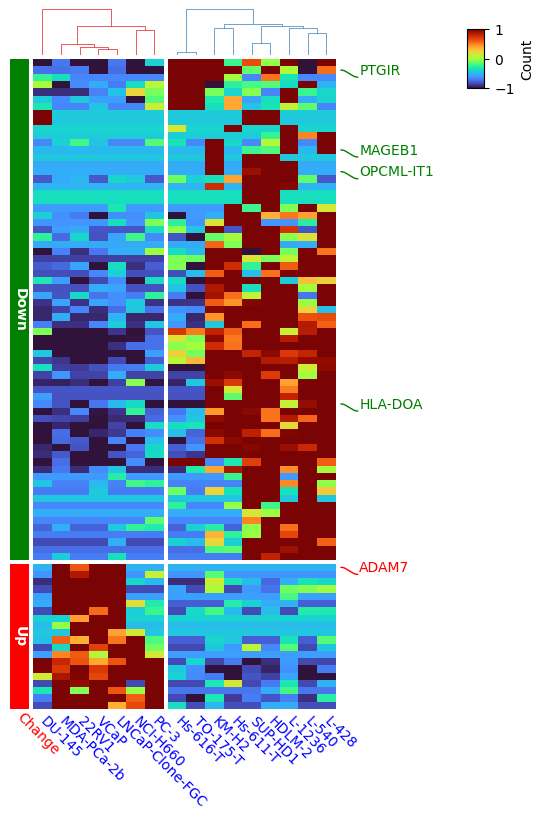

In [29]:
rank2 = pd.DataFrame(index=expr.index, data= ['Up']*20+['Down']*69, columns=['Regulation']) #top20 genes upregulated
print(rank2)

goi= ['ADAM7', 'HLA-DOA',  'PTGIR', 'OPCML-IT1',  'MAGEB1']
colors_dict={}
for g in goi:
    if g=='ADAM7':
        colors_dict[g]='red'
    else:
        colors_dict[g]='green'

label_rows = expr.apply(lambda x:x.name if x.name in goi else None,axis=1)
print(label_rows)
print(expr.shape)


row_ha_left = HeatmapAnnotation(
                            Change =anno_simple(rank2['Regulation'],colors={'Up': 'red', 'Down': 'green'},
                                                add_text=True,legend=False,height=5,
                                                text_kws={'color':'white', 'fontsize':10,'fontweight':'bold',
                                                          'rotation':-90,'horizontalalignment':'left'}), 
                            label_kws={'fontsize':10,'color':'red','rotation':-45},
                            label_side='bottom',axis=0,verbose=0
                            )

row_ha_right = HeatmapAnnotation( 
                            selected=anno_label(label_rows, colors=colors_dict),  #label_side='top',
                            axis=0,verbose=0, 
                            label_kws={'rotation':0,'horizontalalignment':'right','verticalalignment':'top', },
                            orientation='right'
                            )  
#plt.show()

plt.figure(figsize=(4.5, 8))
cm = ClusterMapPlotter(data=expr,  z_score=0,
                        right_annotation=row_ha_right, left_annotation=row_ha_left,#
                        col_cluster=True,row_cluster=True,
                        label='Count',row_dendrogram=False, 
                        col_dendrogram=True, show_rownames=True,show_colnames=True, 
                        cmap='turbo',
                        row_split=rank2['Regulation'],row_split_gap=0.8,
                        col_split=2,col_split_gap=1,
                        tree_kws={'col_cmap': 'Set1'}, xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'}
                       )
# you can add row_split if you want: uncomment it.


# print(cm.row_order)
# print(cm.col_order)
plt.savefig("heatmap.pdf",bbox_inches='tight')
plt.show()

In [40]:
expr.head()

,NCI-H660,PC-3,VCaP,DU-145,MDA-PCa-2b,22RV1,LNCaP-Clone-FGC,SUP-HD1,L-540,L-1236,KM-H2,HDLM-2,Hs-616-T,L-428,Hs-611-T,TO-175-T
ADAM7,-1.000000,-1.0,-0.044425,-1.0,-0.303654,-0.604782,-0.123861,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0
C8orf34-AS1,-1.000000,-1.0,-0.015847,-1.0,-0.848602,-0.215875,-0.251406,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0
SMIM28,-0.795724,-1.0,-0.092080,-1.0,-1.000000,0.070939,-0.705117,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0
LINC01114,-1.000000,-1.0,-0.241584,-1.0,-1.000000,-0.766805,-0.132841,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0
KLK3,-1.000000,-1.0,0.531804,-1.0,1.000000,0.564560,1.000000,-0.832337,-0.442301,-0.472336,-0.359856,-0.911472,-0.795981,-0.391838,-1.0,-1.0
